# Support Vector Machines

## 1 Support Vector Machines

### 1.1 SVM with Linear Kernels


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from scipy.io import loadmat

data = loadmat('ex6data1.mat')

X = data['X']
y = data['y'].flatten()

In [3]:
print(X.shape)
print(y.shape)

(51, 2)
(51,)


In [4]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [5]:
def plotData(X, y):
    """plots the data points with + for the positive examples
%   and o for the negative examples. X is assumed to be a Mx2 matrix.
    Expects y is 1d array containing elements of either 1 or 0
    """
    fig, ax = plt.subplots(figsize=(7.5, 7.5))

    Xp = X[y==1, :]
    Xn = X[y==0, :]

    ax.plot(Xp[:, 0], Xp[:, 1], 'k+', markersize=8, label='Positive')
    ax.plot(Xn[:, 0], Xn[:, 1], 'yo', markersize=8, label='Negative')

    ax.legend()
    
    return fig, ax 

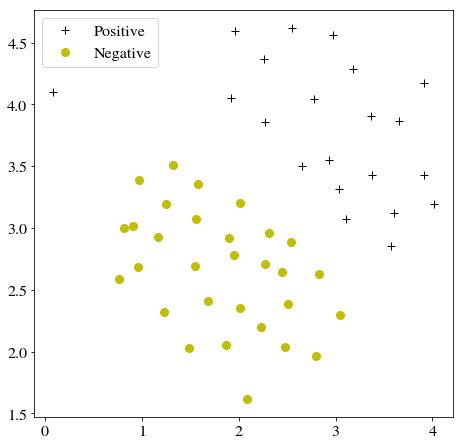

In [6]:
# plot
fig, ax = plotData(X, y)

In [7]:
# SVM to perform classification
from sklearn.svm import SVC

clf1 = SVC(C=1, kernel='linear', tol=0.001)
clf1.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Using regularization, C=1')

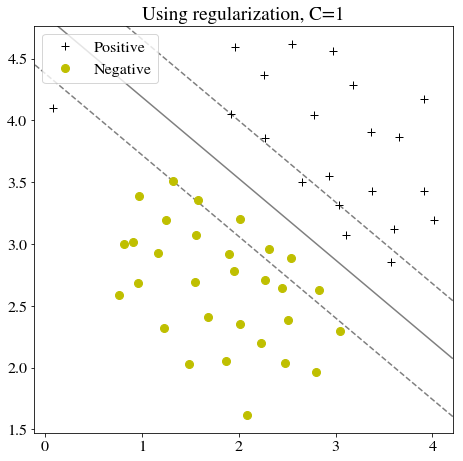

In [8]:
# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# comment
ax.set_title('Using regularization, C=1')

In [9]:
# SVM to perform classification
# this time with C=1000, almost no regularization
clf2 = SVC(C=1000, kernel='linear', tol=0.001)
clf2.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Using regularization, C=1000')

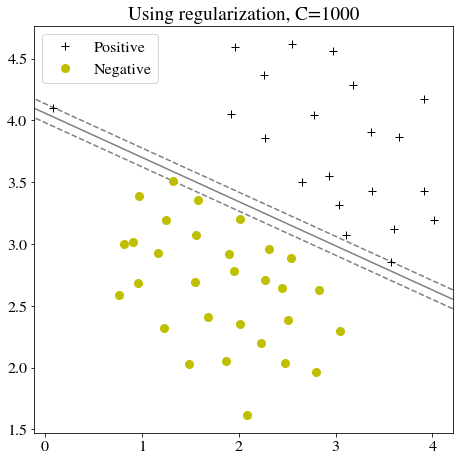

In [10]:
# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# comment
ax.set_title('Using regularization, C=1000')

### 1.2 SVM with Gaussian Kernels

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. Gaussian kernel is a similarity functioin that measures the distance between a pair of examples $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. 

The Gaussian kernel function is defined as:

$$K_{gaussian}(x^{(i)}, x^{(j)})=exp\left(-\frac{\|x^{(i)} - x^{(j)}\|^2}{2\sigma^2}\right)$$

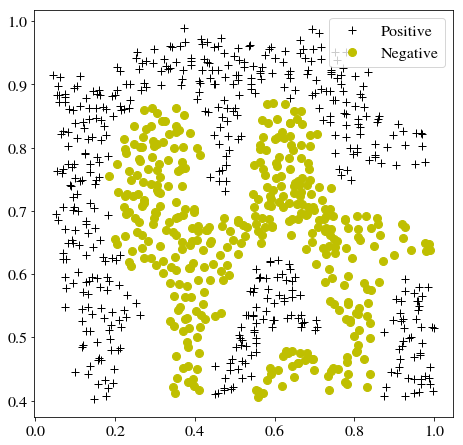

In [11]:
# Visualizing dataset 2

data = loadmat('ex6data2.mat')
X = data['X']
y = data['y'].ravel()

fig, ax = plotData(X, y)

In [47]:
def build_gaussianKernel(sigma):
    """
    svm.SVC requires custom kernel to have 2 arguments x1 and x2, 
    so use closure to include parameter sigma.
    """
    
    def gaussianKernel(x1, x2):
        """returns a gaussian kernel between x1 and x2
    %   and returns the value in sim (similarity)   
        """        
#         # debugging codes
#         print('Shape of x1 is {}'.format(x1.shape))
#         print('Shape of x2 is {}'.format(x2.shape))
        

        # number of samples (in training, this equals to training samples, in test, this equals to test samples)
        m = x1.shape[0]
        
        # number of features
        n = x2.shape[0]
        
        sim = np.zeros((m, n))
        for j in range(n):
            for i in range(m):
                sim[i, j] = np.exp(-(np.linalg.norm(x1[i, :]-x2[j, :]))**2 / (2*sigma**2))
                
        return sim
    
    return gaussianKernel

Shape of x1 is (863, 2)
Shape of x2 is (863, 2)
Shape of x1 is (900, 2)
Shape of x2 is (863, 2)


Text(0.5,1,'Using Gaussian Kernel')

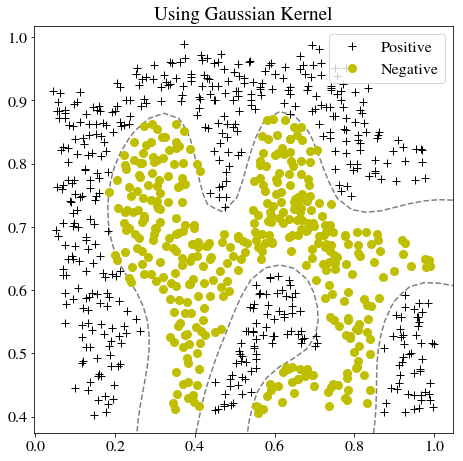

In [48]:
# perform classification
clf3 = SVC(C=1, kernel=build_gaussianKernel(sigma=0.1), tol=0.001)
clf3.fit(X, y)

# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5, linestyles=['--', '-', '--'])

# comment
ax.set_title('Using Gaussian Kernel')

Text(0.5,1,'Using RBF Kernel')

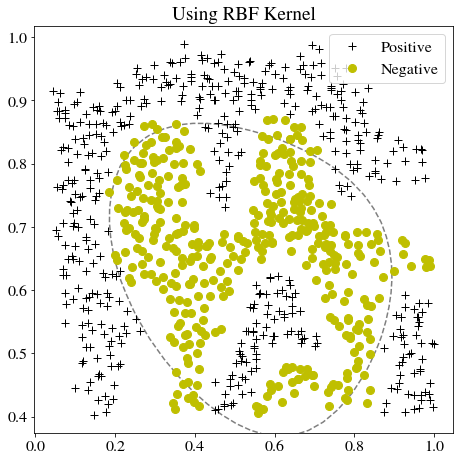

In [21]:
# perform classification
clf4 = SVC(C=1000, kernel='rbf', tol=0.001)
clf4.fit(X, y)

# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf4.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5, linestyles=['--', '-', '--'])

# comment
ax.set_title('Using RBF Kernel')

In [22]:
Xt = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Yt = [0] * 8 + [1] * 8

In [23]:
print(Xt)
print(Yt)

[[ 0.4 -0.7]
 [-1.5 -1. ]
 [-1.4 -0.9]
 [-1.3 -1.2]
 [-1.1 -0.2]
 [-1.2 -0.4]
 [-0.5  1.2]
 [-1.5  2.1]
 [ 1.   1. ]
 [ 1.3  0.8]
 [ 1.2  0.5]
 [ 0.2 -2. ]
 [ 0.5 -2.4]
 [ 0.2 -2.3]
 [ 0.  -2.7]
 [ 1.3  2.1]]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [33]:
X.shape

(863, 2)